In [46]:
"""Data Preparation Library"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import numpy as np

"""Models Library"""
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

"""Model Evaluation"""
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

"""Other"""
import warnings
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [9]:
# Load dataset
df = pd.read_csv("Dataset_v2.csv")

# First 5 rows of data
df.head()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Label,Pattern
0,15.15,25.5,67,17660,6.4,855,427,29.7,Selada,1
1,17.22,26.9,80,86930,6.7,929,464,27.0,Selada,1
2,7.33,25.7,77,23320,6.1,900,449,25.4,Selada,1
3,9.18,26.6,69,32280,6.7,887,443,26.1,Selada,1
4,10.39,25.8,65,41750,6.6,967,482,25.7,Selada,1


In [10]:
df = df.drop(columns=['Jam', 'Label'])

df.head()

,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
0,25.5,67,17660,6.4,855,427,29.7,1
1,26.9,80,86930,6.7,929,464,27.0,1
2,25.7,77,23320,6.1,900,449,25.4,1
3,26.6,69,32280,6.7,887,443,26.1,1
4,25.8,65,41750,6.6,967,482,25.7,1


In [13]:
# Tentukan kolom yang akan dipertimbangkan
kolom_yang_dipertimbangkan = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']

# Hitung IQR untuk kolom-kolom yang sudah ditentukan
Q1 = df[kolom_yang_dipertimbangkan].quantile(0.25)
Q3 = df[kolom_yang_dipertimbangkan].quantile(0.75)
IQR = Q3 - Q1

# Filter outlier untuk kolom-kolom yang sudah ditentukan
insurance = df[~((df[kolom_yang_dipertimbangkan] < (Q1 - 1.5 * IQR)) | (df[kolom_yang_dipertimbangkan] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Periksa ukuran dataset setelah menghapus outlier
insurance.shape

(4054, 8)

In [14]:
# Correlation Matrix
cor_matrix = df.corr()
cor_matrix

,temperature,humidity,light,pH,EC,TDS,WaterTemp,Pattern
temperature,1.000000,0.001935,0.000494,0.006603,-0.031554,-0.031461,-0.004811,-0.000315
humidity,0.001935,1.000000,-0.070975,0.016518,0.045092,0.044673,-0.101836,-0.049649
light,0.000494,-0.070975,1.000000,-0.027438,0.013735,0.012359,0.083195,0.004200
pH,0.006603,0.016518,-0.027438,1.000000,-0.063254,-0.065248,-0.023790,-0.065984
EC,-0.031554,0.045092,0.013735,-0.063254,1.000000,0.995993,-0.023934,0.571283
TDS,-0.031461,0.044673,0.012359,-0.065248,0.995993,1.000000,-0.021312,0.569847
WaterTemp,-0.004811,-0.101836,0.083195,-0.023790,-0.023934,-0.021312,1.000000,0.003337
Pattern,-0.000315,-0.049649,0.004200,-0.065984,0.571283,0.569847,0.003337,1.000000


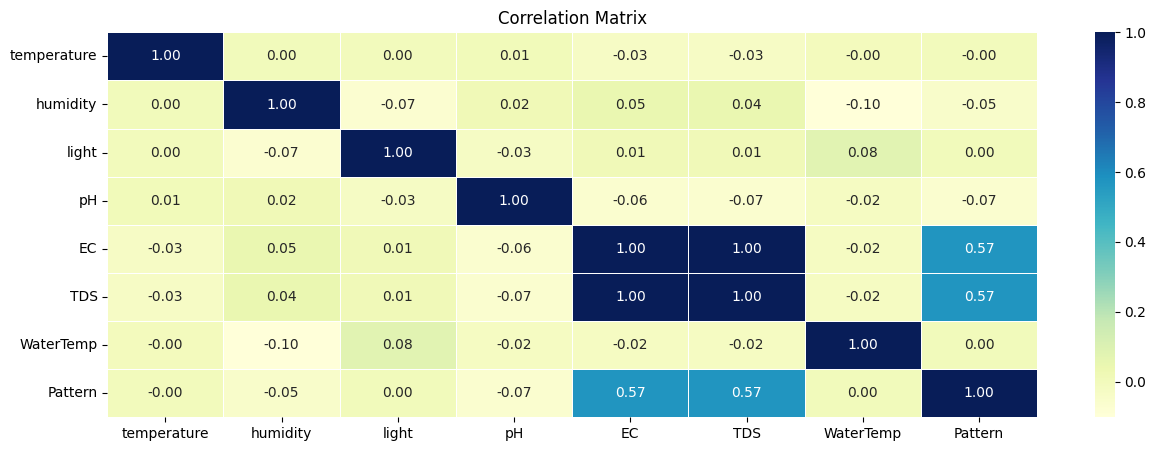

In [15]:
# Heatmap of the correlation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(cor_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [36]:
# Filter data for training and testing
train_data = df[df['Pattern'] == 2]

# Add synthetic class to training data
synthetic_data = train_data.sample(n=1, random_state=42).copy()
synthetic_data['Pattern'] = 0  # Add a synthetic pattern value
train_data = pd.concat([train_data, synthetic_data])

# Prepare the test data ensuring it includes all patterns
test_data = df[df['Pattern'] != 2]


In [37]:
# Combine the test data to ensure it includes all patterns
test_data = pd.concat([
    test_data,
    train_data[train_data['Pattern'] == 2]  # Adding Pattern 2 instances to the test set
])

In [38]:
# Separate features and target
features = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']
X_train = train_data[features]
y_train = train_data['Pattern']
X_test = test_data[features]
y_test = test_data['Pattern']

In [39]:
# Define the Gradient Boosting Classifier model with specified parameters
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=10)

# Train the model
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10)

In [40]:
# Predict on testing set
y_test_pred = model.predict(X_test)

# Evaluation metrics on testing set
print("Testing Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))


Testing Set Metrics:
Accuracy: 0.3062937062937063
Precision: 0.09381583451513521
Recall: 0.3062937062937063
F1 Score: 0.14363666312274448


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


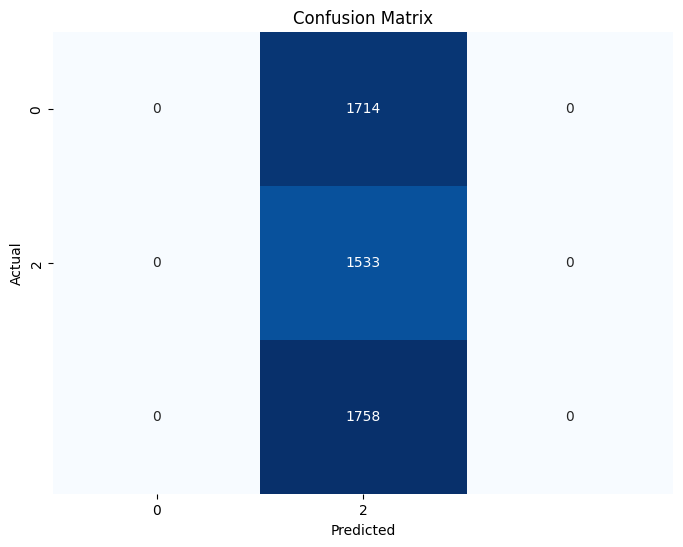

In [41]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Filter data for training and testing
train_data = df[df['Pattern'] == 2]

# Add synthetic class to training data if necessary
synthetic_data = train_data.sample(n=1, random_state=42).copy()
synthetic_data['Pattern'] = 0  # Add a synthetic pattern value
train_data = pd.concat([train_data, synthetic_data])

# Prepare the test data ensuring it includes all patterns
test_data = df[df['Pattern'] != 2]

# Combine the test data to ensure it includes all patterns
test_data = pd.concat([
    test_data,
    train_data[train_data['Pattern'] == 2]  # Adding Pattern 2 instances to the test set
])

# Separate features and target
features = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']
X_train = train_data[features]
y_train = train_data['Pattern']
X_test = test_data[features]
y_test = test_data['Pattern']

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Define the classifiers to compare
classifiers = {
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC()
}

# Hyperparameters for tuning
params = {
    "GradientBoostingClassifier": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    },
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
    "SVC": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf']
    }
}

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 440, in fit
    y = self._validate_y(y, sample_w

Model: GradientBoostingClassifier
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3}
Testing Set Metrics:
Accuracy: 0.3062937062937063
Precision: 0.09381583451513521
Recall: 0.3062937062937063
F1 Score: 0.14363666312274448



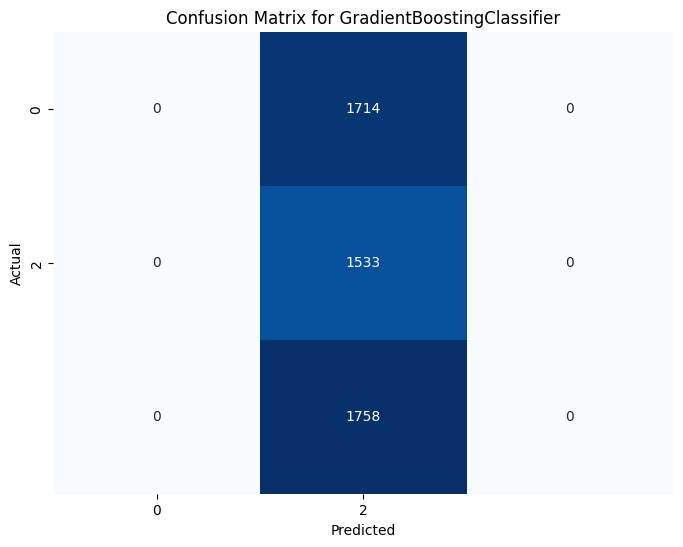

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Testing Set Metrics:
Accuracy: 0.3062937062937063
Precision: 0.09381583451513521
Recall: 0.3062937062937063
F1 Score: 0.14363666312274448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


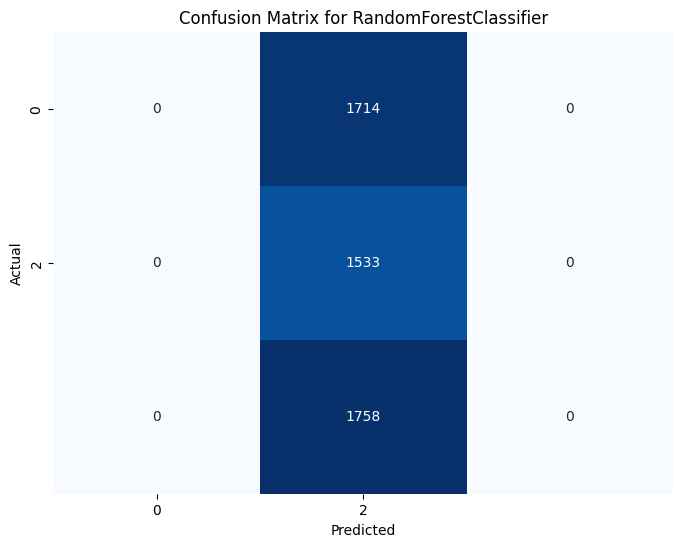

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 201, in fit
    y = self._validate_targets(y)
  Fil

Model: SVC
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Testing Set Metrics:
Accuracy: 0.3062937062937063
Precision: 0.09381583451513521
Recall: 0.3062937062937063
F1 Score: 0.14363666312274448



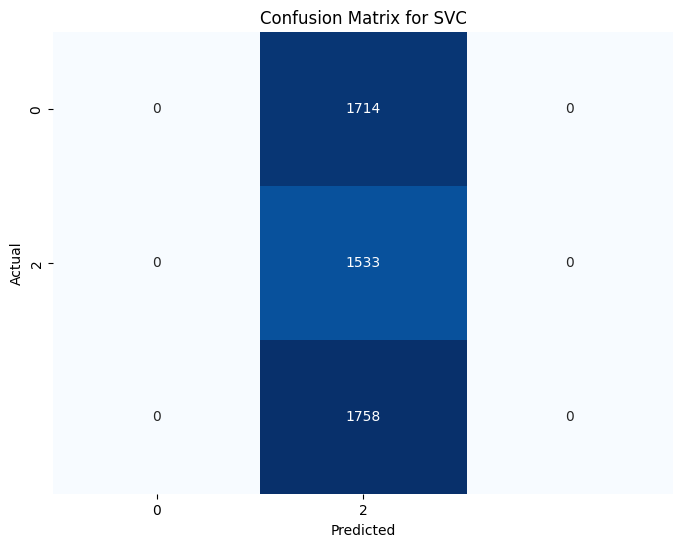

In [47]:
# Training and evaluating each classifier
for name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, params[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best estimator
    best_model = grid_search.best_estimator_

    # Predict on testing set
    y_test_pred = best_model.predict(X_test)

    # Evaluation metrics on testing set
    print(f"Model: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Testing Set Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
    print()

    # Confusion matrix
    conf_mat = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [16]:
# Membuat fitur-fitur yang akan digunakan
fitur = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']

# Mengganti nilai-nilai dalam DataFrame
X = df[fitur]

# Variabel Target
y = df['Pattern']

In [17]:
# Memisahkan data menjadi data latih dan data uji dengan perbandingan 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Memeriksa kolom-kolom non-numeric
kolom_non_numerik = X.select_dtypes(exclude=['float64', 'int64']).columns
print("Kolom non-numeric:", kolom_non_numerik)

Kolom non-numeric: Index([], dtype='object')


In [19]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Define the Gradient Boosting Classifier with specified parameters
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=10)

In [21]:
# Train the model
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10)

In [22]:
# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation metrics on training set
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))

# Evaluation metrics on testing set
print("\nTesting Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))

Training Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Testing Set Metrics:
Accuracy: 0.9330669330669331
Precision: 0.9335109037607364
Recall: 0.9330669330669331
F1 Score: 0.933237341313601


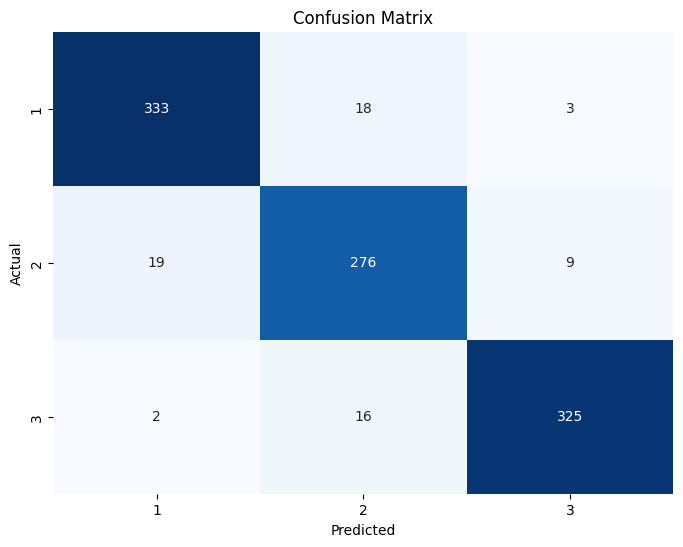

In [23]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
features = ['temperature', 'humidity', 'light', 'pH', 'EC', 'TDS', 'WaterTemp']

In [24]:
# Function to get user input and make prediction
def predict_pattern(model, features):
    # Initialize empty dictionary to store user input
    user_input = {}

    # Prompt user for input for each feature
    for feature in features:
        user_input[feature] = float(input(f"Enter {feature}: "))

    # Create a DataFrame with user input
    input_data = pd.DataFrame([user_input])

    # Make prediction using the trained model
    prediction = model.predict(input_data)

    return prediction[0]

In [27]:
# Example usage:
if __name__ == "__main__":
    # Prompt user for input and make prediction
    predicted_pattern = predict_pattern(model, features)

    print(f"\nPredicted Pattern: {predicted_pattern}")

Enter temperature: 25.5
Enter humidity: 67
Enter light: 17660
Enter pH: 6.4
Enter EC: 855
Enter TDS: 427
Enter WaterTemp: 29.7

Predicted Pattern: 1
